# Memfilter pada citra 2D

## Low-pass filter

In [18]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

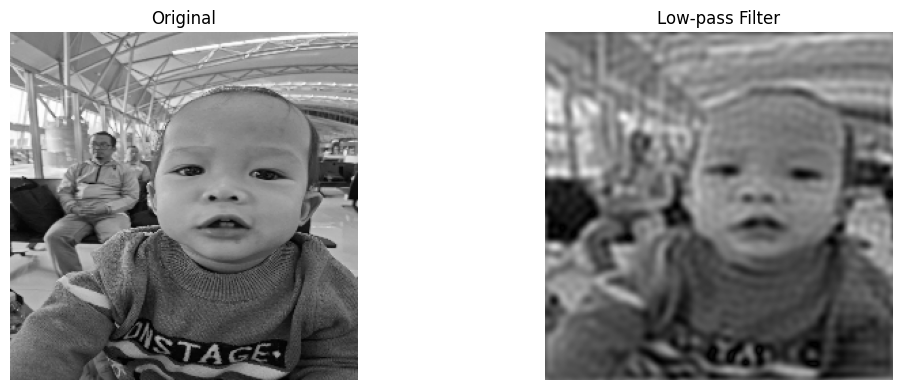

In [19]:
import cv2
from PIL import Image
import requests
from io import BytesIO

# Download gambar Cameraman
img_pil = Image.open('data/Gambar1.jpg').convert("L")  # Grayscale
img = np.array(img_pil)
img = cv2.resize(img, (256, 256))

# FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Masking
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
radius = 30

low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), radius, 1, thickness=-1)


# Apply filter
f_low = fshift * low_pass_mask


# Inverse FFT
img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))


# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(img_low, cmap='gray')
axs[1].set_title("Low-pass Filter")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


## High-Pass Filter

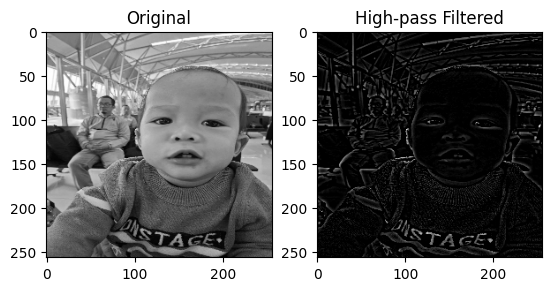

In [20]:
blur = cv2.GaussianBlur(img, (11,11), 0)
high_pass = cv2.subtract(img, blur)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(high_pass, cmap='gray'), plt.title('High-pass Filtered')
plt.show()

## Band-Stop Filter

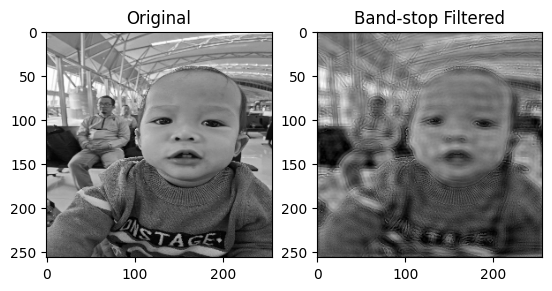

In [21]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Buat band-stop filter di domain frekuensi
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols), np.uint8)
r_out, r_in = 60, 20  # Rentang radius bandstop
for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i-crow)**2 + (j-ccol)**2)
        if r_in < d < r_out:
            mask[i,j] = 0

fshift_filtered = fshift * mask
img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
img_back = np.abs(img_back)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Band-stop Filtered')
plt.show()
